___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import scipy.stats as stats

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
ad_data.describe().round(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0
mean,65.00,36.01,55000.00,180.00,0.48,0.5
std,15.85,8.79,13414.63,43.90,0.50,0.5
min,32.60,19.00,13996.50,104.78,0.00,0.0
25%,51.36,29.00,47031.80,138.83,0.00,0.0
50%,68.22,35.00,57012.30,183.13,0.00,0.5
75%,78.55,42.00,65470.63,218.79,1.00,1.0
max,91.43,61.00,79484.80,269.96,1.00,1.0


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

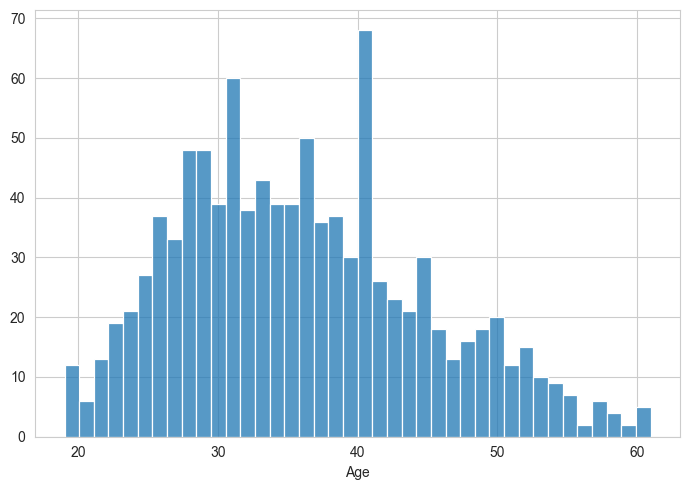

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.histplot(data = ad_data, x = 'Age', bins = 40)
plt.ylabel('')

plt.tight_layout()
plt.show()

**Create a jointplot showing Area Income versus Age.**

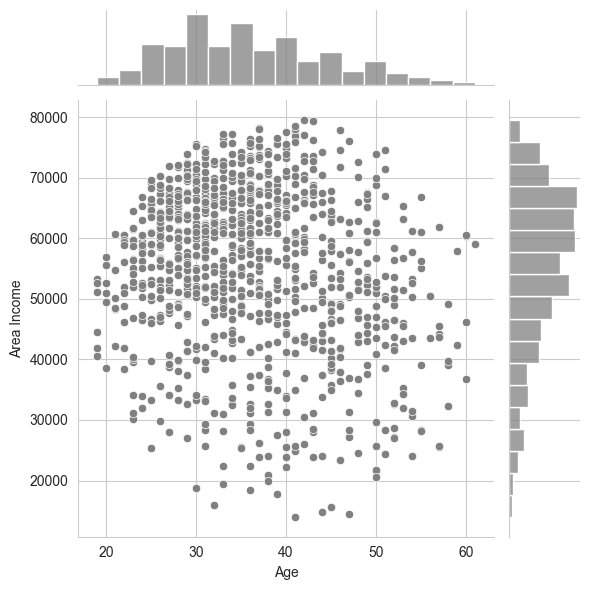

In [63]:
x = 'Age'
y = 'Area Income'

sns.jointplot(data = ad_data, x = x, y = y, kind='scatter', color='gray')

plt.tight_layout()
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

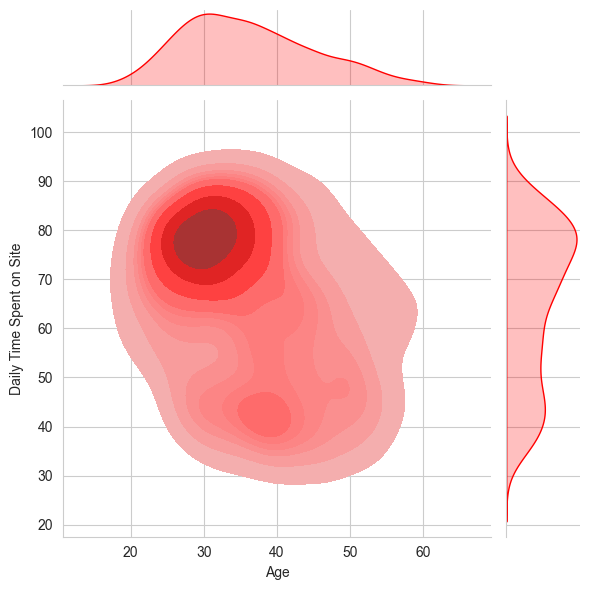

In [58]:
x = 'Age'
y = 'Daily Time Spent on Site'

g = sns.jointplot(data = ad_data, x = x, y = y, kind='kde', color='red', fill = True)

plt.tight_layout()
plt.show()


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

<Figure size 64000x48000 with 0 Axes>

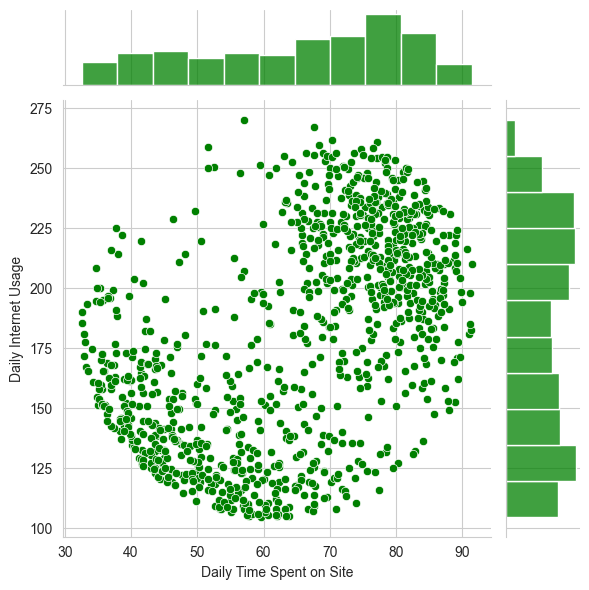

In [59]:
x = 'Daily Time Spent on Site'
y = 'Daily Internet Usage'

plt.figure(dpi= 10000)
graph = sns.jointplot(data = ad_data, x = x, y = y, kind='scatter', color = 'green')


plt.tight_layout()
plt.show()

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

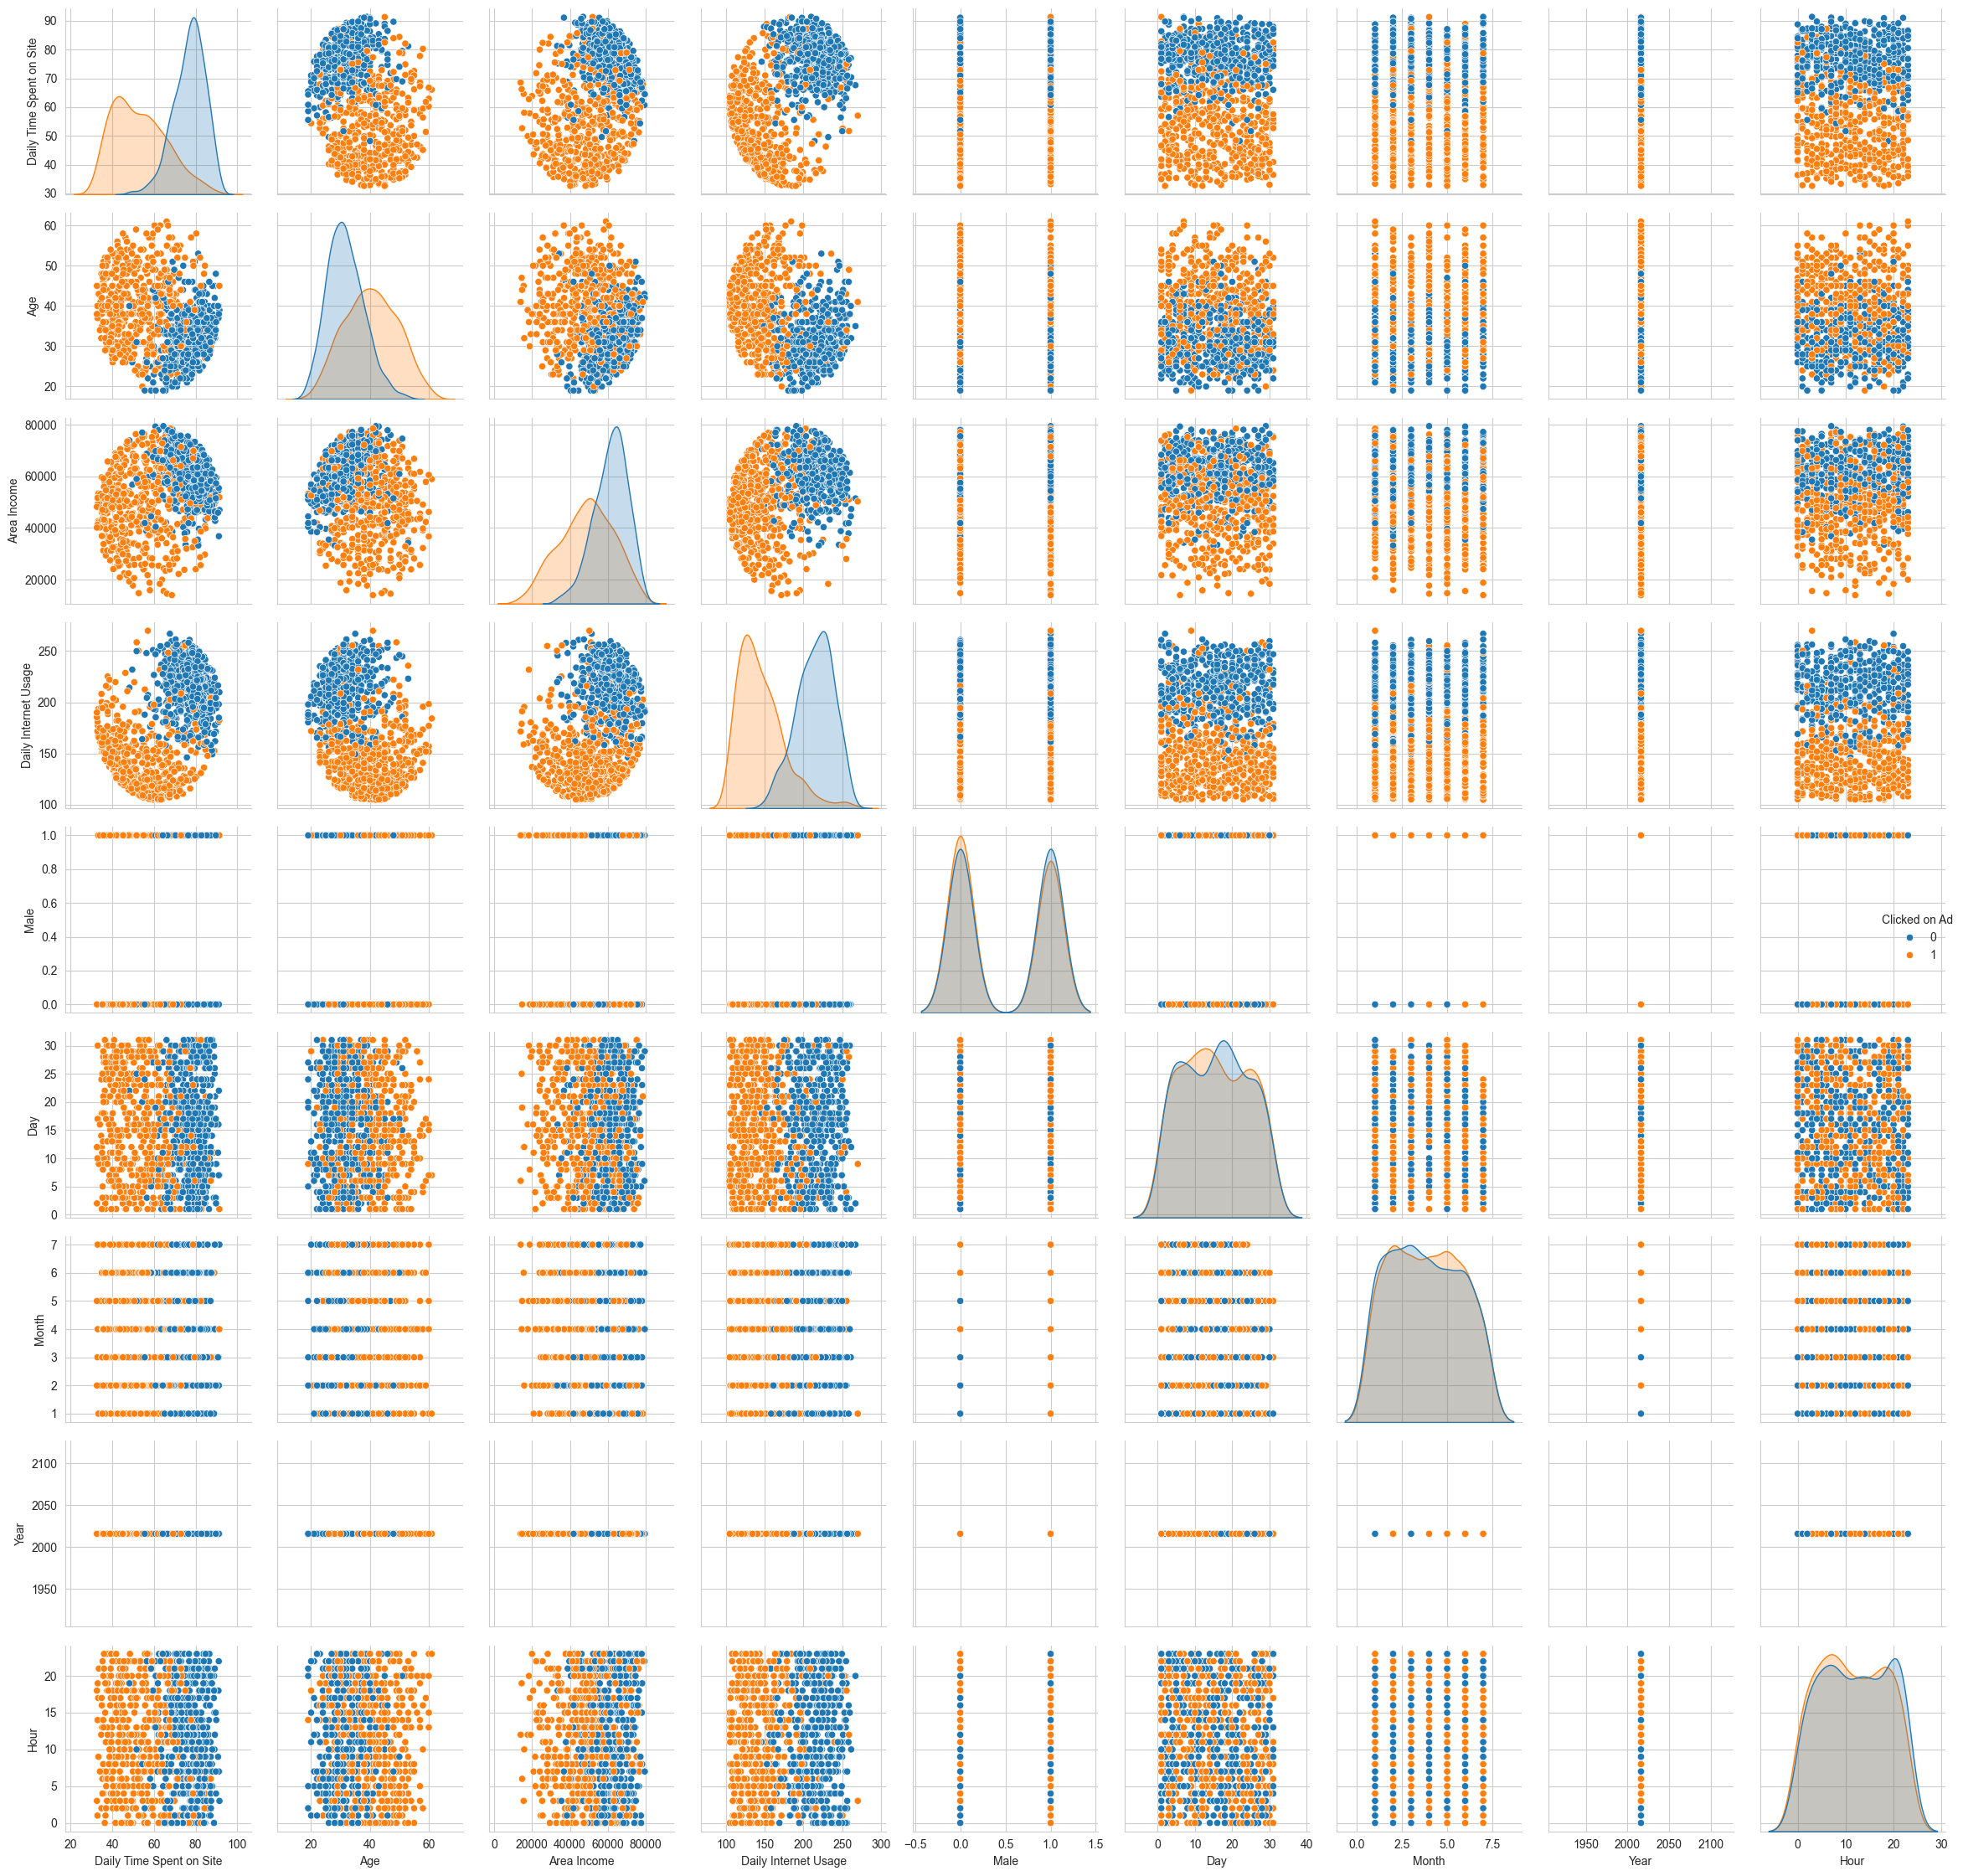

In [54]:
g = sns.pairplot(data = ad_data, hue= 'Clicked on Ad')
plt.tight_layout()
plt.show()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

In [11]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

ad_data['Day'] = ad_data['Timestamp'].apply(lambda x: x.day)
ad_data['Month'] = ad_data['Timestamp'].apply(lambda x: x.month)
ad_data['Year'] = ad_data['Timestamp'].apply(lambda x: x.year)
ad_data['Hour'] = ad_data['Timestamp'].apply(lambda x: x.hour)     # We only have 2016 in this dataset, but i am thinking if the dataset was refreshing along the time (preparing this parameter to the future)


In [12]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Day                       1000 non-null   int64         
 11  Month                     1000 non-null   int64         
 12  Year                 

** Split the data into training set and testing set using train_test_split**

In [13]:
# Features
X = ad_data.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'], axis = 1)

In [14]:
# What we want to predict

y = ad_data['Clicked on Ad']

** Train and fit a logistic regression model on the training set.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [17]:
y_predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       160
           1       0.97      0.99      0.98       140

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [19]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_predictions,y_test)

print(matrix)

total = np.sum(matrix)
correct = np.sum([matrix[0][0], matrix[1][1]])
incorrect = np.sum([matrix[0][1], matrix[1][0]])

print(f'The model got {(correct/total).round(2)} of precision, having {(incorrect/total).round(2)} of errors')

[[155   5]
 [  2 138]]
The model got 0.98 of precision, having 0.02 of errors
